# Review Week 10 (Deep Learning/Neural Networks)

## Intro to Neural Networks + Keras 


### Differentiate between single layer and multi-layer perceptrons
- **Single Layer's** have no hidden layer, just input features and a single activation function with an output which can be interpreted as the prediction. Just like the way most models we have talked about work.
- **Multi Layer's** have 1 or more hidden layers where data is transformed and new interaction terms are created to be used to predict the output or feed into additional layers.

### Define epoch, learning rate, activation function, hidden layer, neuron, weights & bias terms.
- **Epoch:** When our full set of training data fully forward and back propagates through our network. 
    - Feed the data through the network.
    - Calculate the errors.
    - Propagate backwards to adjust network to better fit the data via found errors.
- **Hidden Layer :** 1 or more neurons that sit in-between our input layer (original features) and our output layer (predictive function) that are responsible for transforming the data.
- **Weights:** Values applied to features as they flow through the network to contribute to interaction.  Weights are randomly initialized and adjusted according to gradient decent on our loss function.  The weights function similar to coefficients in a linear or logistic regression in which the weights multiply the original value in order to affect how much each feature contributes to the interaction term that results from the activation function.
- **Bias Terms:** Constant values that are added in to each neuron.  These are also adjusted the same way the weights are, however they exist on their own and do not _weight_ any other value.
- **Activation Function:** A function on the neuron that takes in the sum of all features after their weights have been applied plus the Bias term and returns a new value that will be used as a feature in the next layer.
- **Neuron:** Neurons are the weights, bias term and activation function.  NNs can have various hidden layers and each hidden layer can have various neurons.  Each neuron has their own unique set of weights and bias term and potentially unique activation function in order to arrive at a single value that represents some kind of combination of all the fed in features.
- **Learning Rate:** How large the steps are that we take when moving through our loss function in order to increase/decrease weights in order to decrease total loss. (Same as gradient Descent)
- **Batch:** Often we can not forward then back propagate our entire dataset at once so we divide it up into batches to flow through chunk by chunk
- **Iteration :**The process of a single batch flowing forward and backward through the network.


### Define Forward and Back Propagation.

**Forward propagation** is the process of data flowing through the network in order to arrive at a predicted value.  
**Backward Propagation** is the act of optimizing a network be working backwards through it, starting with the errors calculate and identifying the points in the network (weights or nodes) that are contributing most to the error and adjusting them accordingly.

# Optimizing Neural Networks & Convolutional Neural Networks



### Explain how L1/L2, dropout, and early stopping regularization work and implement these methods in Keras

**Regularization**
- Incorporating either LASSO or Ridge regularization into back propagation is as simple as adding the regularization term to the loss function (ok, not very simple at all when you look at the math)
- L1 typically isn't used in NNs.
- L2 is much more popular and sometimes referred to as "weight decay". 

**Dropout**
- The process of randomly removing nodes in training epochs to see how it affects the model.  A NN with densly connected layers will have the tendency to overfit so we can utilize drop out in order better understand if nodes should be removed or kept.  (Similar to how Random Forests reduce variance and overfitting.)
- Dropouts can occur at any epoch and the models "constant fear" of loosing a node at any time prevents the over adjustment of a weight for an epoch.

**Early Stopping**
- Compares how much the loss function is changes and stops the algorithm once it hits the point where the loss function starts to go up.  This is done with the assumption that the first minimum that was hit it the global minimum. 

### Describe Gradient Descent with Momentum and Data Augmentation

**Gradient Descent with Momentum**

**Data Augmentation**
- Generating more data from existing data.  With pictures this can be the result of transposing, rotating or reflecting and image to create a new version of it.  In addition SMOTE can be used to generate more similar observations.

### Identify use cases of Convolutional Neural Networks.
- Convolutional NNs consider features related to one another via proximity, this makes them great for assessing pictures because they are able to break down a picture the way humans do, by focusing one specific areas of the photo.

### Understand how edge detection works in CNNs
- An edge is identified by discontinuity in an image typically in color.  
- When we pass our weights window over a panel of data in a picture we transform and map the image into smaller dimensions. 
- Our Window will have conflicting/balanced weights on each side of it, one side very positive and one side very negative. If there is a significant difference in color/greyscale (what we would interpret as a edge). When the window passes over it, the weights applied on each side of the window will no longer neutral out and instead result in a significant positive or negative value indicating there is a drastic difference in shading from one side of the window to another.


**Edge Detection**

Lets say we have a 5 by 1 image and a window size that is 2 by 1 that we're going to move across out image. _below_.

It doesn't matter what value we assign to the pixels as long as different colors are represented by different values. Lets assign a value of `-1` to white and `1` to black.  Our window weights will be `10` and `-10`.


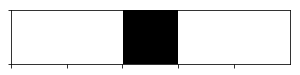

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline
sns.palplot(sns.color_palette(['#FFFFFF','#FFFFFF', '#000000','#FFFFFF','#FFFFFF']))

In [2]:
w = np.array([10,-10])

# first frame is a white block then another white block
f1 = np.array([-1,-1])
# second frame is white block then a black block
f2 = np.array([-1, 1])
# third frame is a black block then a white block
f3 = np.array([ 1,-1])
f4 = np.array([-1,-1])

In [3]:
# frame one has no differences in it thus is sums to zero
sum(f1*w)

0

In [4]:
# frame two HAS differences in it, thus its sum is far away from zero
sum(f2*w)
# its a negative value because its a light to dark transition

-20

In [5]:
# frame three HAS differences in it, thus its sum is far away from zero
sum(f3*w)
# its a positive value because its a dark to light transition

20

In [6]:
# frame four has no differences in it thus is sums to zero
sum(f4*w)

0

### Define and describe "padding" and "strided" convolutions.
- **Padding :** Given that the way edges flow over a picture an aspect of padding can be added.  This is essentially adding boarding cells of neutral values around a picture so that pixels that are in corners or along edges can be considered more often.
    - In the event there is something important in the corner of an image, without having padding that corner may only be considered once.
    - Typically we as humans gravitate our focus towards the center of an image and work outward, they further away from the center objects are in a picture the less we notice them, think about what happens in the corners of pictures.  Its typically not a place you consciously look at when looking at a picture, padding tries to combat NNs from picking up on this same habit.

- **Strides:** Stride values determines how many units our window will shift as it flows through the image. 
    - If a stride is set to 1, then between each window iteration the window will move 1 unit (1 pixel)
    - If a stride is set to 2, then the window will shift over 2 units (2 pixels).
    
### Understand how convolutions operate on volumes.
- Volume in terms of a CNN are the aspect of dividing our original image up into several versions.  Typical case is dividing a color image up into three images 1 to represent the Red coloring, 1 to represent the Green coloring, and 1 to represent the Blue coloring (this is done with the RGB color spectrum)
- Each color layer will have its own weight window applied to it, after that the results of all 3 weight windows * values will be aggregated into a single matrix.

### Define pooling and implement max pooling.
- Pooling layers allow us to compress output from the convolution layers.
    - Max Pooling is typically the tactic used in the pooling layer.  This identifies and takes the strongest/most important info for retention.  
    - Pooling is done independently across channels.  (Each "node" has its own unique pooling)
